In [1]:
#!/usr/bin/env python
# coding: utf-8

"""
    Description:
    Gera um mapa com as estacoes mais proximas de um ponto e suas altitudes.
    
    @author: DiegoSantos
    Created: 2024-06-20
"""

#importando as bibliotecas
import pandas as pd
import xarray as xr
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

from geopy import distance
from shapely.geometry import Point
from mpl_toolkits.mplot3d import Axes3D

import plotly.offline as go_offline
import plotly.graph_objects as go


In [2]:
#Abrindo o arquivo de elevacao
#df_alt = xr.open_dataset(f'elevacao_cut.nc')
df_alt2 = xr.open_dataset(f'data.nc')

#Abrindo o shape dos estados do Brasil
bra = gpd.read_file('./shp/BRA_adm1.shp')

#Abrindo o shape da América do Sul
#asul = gpd.read_file('./shp/GEOFT_PAIS.shp')


C:\Users\dfsan\anaconda3\envs\aton_meteo\lib\site-packages\gribapi\__init__.py:23: UserWarning:

ecCodes 2.31.0 or higher is recommended. You are running version 2.27.0



In [3]:
print(df_alt2)

<xarray.Dataset>
Dimensions:  (Y: 21600, X: 43200)
Coordinates:
  * Y        (Y) float32 90.0 89.99 89.98 89.97 ... -89.97 -89.98 -89.99 -90.0
  * X        (X) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0 180.0
Data variables:
    topo     (Y, X) float32 ...


In [3]:
#Calculando as estacoes que estao proximos a cidade de Campos do Jordao
campos = (-22.7331, -45.5831)

lat = df_data.latitude.values 
lon = df_data.longitude.values
alt = df_data.elevacao.values
cod = df_data.id.values

list_lat = []
list_lon = []
list_alt = []
list_cod = []

for i in range(len(cod)):
    ponto = (lat[i], lon[i])
    distancia = distance.distance(campos, ponto).km
    
    if distancia <= 70.0:
    #if distancia <= 50.0 and df_data.fonte.values[i] == 'INMET':
        list_lat.append(lat[i])
        list_lon.append(lon[i])
        list_alt.append(alt[i])
        list_cod.append(cod[i])

df = pd.DataFrame({ 'id': list_cod,
                    'lat': list_lat,
                    'lon': list_lon,
                    'alt': list_alt})

filename = f'lista_estacoes_all_70km.csv'
with open(f'./output/{filename}', mode='w', newline='', encoding='utf-8') as arquivo_csv:
    write = csv.writer(arquivo_csv, delimiter=',') # Cria um escritor de CSV
    df.to_csv(arquivo_csv, index=False)
    print(f'Done --> ./output/{filename}\n')     
arquivo_csv.close()


Done --> ./output/lista_estacoes_all_70km.csv



In [7]:
#Calculando as estacoes que estao na area
campos = (-22.7331, -45.5831)

lat = df_data.latitude.values 
lon = df_data.longitude.values
alt = df_data.elevacao.values
cod = df_data.id.values
lim = np.array([-46.5, -45.0, -23.5, -22.0])

list_lat = []
list_lon = []
list_alt = []
list_cod = []

for i in range(len(cod)):
    if lon[i] >= lim[0] and lon[i] <= lim[1] and lat[i] >= lim[2] and lat[i] <= lim[3]: 
        list_lat.append(lat[i])
        list_lon.append(lon[i])
        list_alt.append(alt[i])
        list_cod.append(cod[i])

df = pd.DataFrame({ 'id': list_cod,
                    'lat': list_lat,
                    'lon': list_lon,
                    'alt': list_alt})

filename = f'lista_estacoes_all_area.csv'
with open(f'./output/{filename}', mode='w', newline='', encoding='utf-8') as arquivo_csv:
    write = csv.writer(arquivo_csv, delimiter=',') # Cria um escritor de CSV
    df.to_csv(arquivo_csv, index=False)
    print(f'Done --> ./output/{filename}\n')     
arquivo_csv.close()


Done --> ./output/lista_estacoes_all_area.csv



In [12]:
#Lista filtrada
df = pd.read_csv('../interpolacao/output/lista_estacoes_all_70km_filter.csv', sep=",")


In [13]:
#Criando a lista de pontos
pontos = [Point(x) for x in zip(df.lon, df.lat)]

# Definindo o sistema de coordenadas
crs={'proj':'latlong','ellps':'WGS84','datum':'WGS84','no_def':True}

# Criando o geodataframe
list_pontos = gpd.GeoDataFrame(df, geometry=pontos, crs=crs)


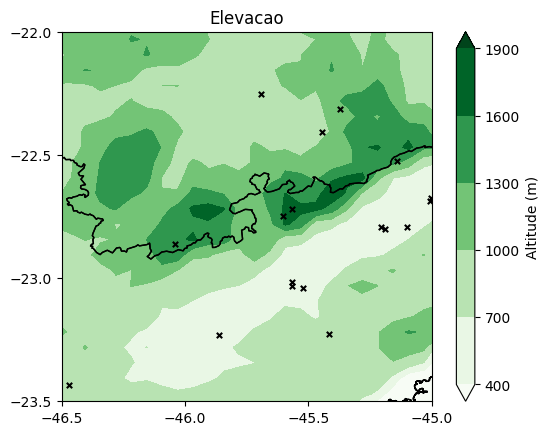

In [15]:
fig, ax = plt.subplots()

ax.set_title('Elevacao')
#ax.set_xlim(-46.5, -43.5)
ax.set_xlim(-46.5, -45) 
#ax.set_ylim(-24.5, -21.5)
ax.set_ylim(-23.5, -22) 
#plt.xticks([-46.0, -45.0, -44.0])
plt.xticks([-46.5, -46.0, -45.5, -45.0])
#plt.yticks([-24.0, -23.0, -22.0])
plt.yticks([-23.5, -23.0, -22.5, -22.0])

map1 = ax.contourf(df_alt['longitude'], df_alt['latitude'], df_alt['elevation'],
                   cmap='Greens', levels=np.arange(400, 2200, 300), extend='both')

bra.plot(facecolor='none', edgecolor= 'k', lw=1, ax=ax)

for index, row in df.iterrows():
    plt.scatter(row['lon'],row['lat'], marker='x', c='black', s=15)
    
fig.colorbar(map1, label='Altitude (m)')
plt.savefig('./output/elevacao_all_area.png', format='png')

plt.show()


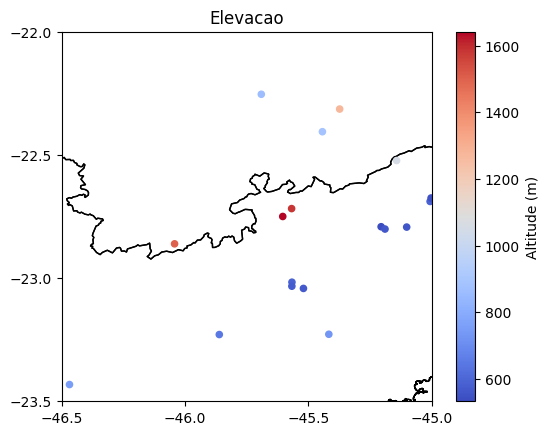

In [14]:
fig, ax = plt.subplots()

ax.set_title('Elevacao')
#ax.set_xlim(-46.5, -43.5)
ax.set_xlim(-46.5, -45) 
#ax.set_ylim(-24.5, -21.5)
ax.set_ylim(-23.5, -22) 
#plt.xticks([-46.0, -45.0, -44.0])
plt.xticks([-46.5, -46.0, -45.5, -45.0])
#plt.yticks([-24.0, -23.0, -22.0])
plt.yticks([-23.5, -23.0, -22.5, -22.0])

bra.plot(facecolor='none', edgecolor= 'k', lw=1, ax=ax)

alt1 = plt.scatter(df['lon'].values, df['lat'].values, c=df['alt'].values, cmap='coolwarm', s=20)

fig.colorbar(alt1, label='Altitude (m)')
plt.savefig('./output/map_all_high.png', format='png')

plt.show()



In [4]:
x = df_alt2['X'].values
y = df_alt2['Y'].values
z = df_alt2['topo'].values

xnew = x[(x >= -46.5) & (x <= -45.0)]
ynew = y[(y >= -23.5) & (y <= -22.0)]

ynew2 = np.sort(ynew, axis=-1, kind=None, order=None)

for i in range(len(x)):
    if x[i] == xnew[0]: i0 = i
    if x[i] == xnew[-1]: i1 = i

for j in range(len(y)):
    if y[j] == ynew[0]: j0 = j
    if y[j] == ynew[-1]: j1 = j
        
znew = z[j0:j1+1,i0:i1+1]        

x_max = np.max(xnew)
x_min = np.min(xnew)
y_max = np.max(ynew)
y_min = np.min(ynew)


In [6]:
znew2 = znew.copy()
c = len(ynew2)

for a in range(len(xnew)):
    for b in range(len(ynew2)):
        d = c - b - 1
        znew2[b,a] = znew[d,a]


In [8]:
df_new = xr.DataArray(znew2, coords=[('latitude', ynew2), ('longitude', xnew)], name='elevation')
df_new.to_netcdf('elevation_cutxx.nc')


In [11]:
import xarray as xr
import numpy as np

# Dimensões
lat = np.arange(-90, 90.25, 0.25)  # De -90 a 90 com passo de 0.25
lon = np.arange(-180, 180.25, 0.25)  # De -180 a 180 com passo de 0.25
time = np.array(["2023-01-01", "2023-01-02"], dtype="datetime64")

# Gerar dados aleatórios (por exemplo, pressão atmosférica)
data = np.random.rand(len(time), len(lat), len(lon)) * 1000  # Pressão em hPa

# Criar Dataset com xarray
ds = xr.Dataset(
    {
        "msl": (["time", "latitude", "longitude"], data),
    },
    coords={
        "time": time,
        "latitude": lat,
        "longitude": lon,
    },
    attrs={"description": "Exemplo de NetCDF com dados aleatórios"}
)

# Salvar como arquivo NetCDF
ds.to_netcdf("example.nc")
print("Arquivo 'example.nc' criado com sucesso!")



Arquivo 'example.nc' criado com sucesso!


C:\Users\dfsan\AppData\Local\Temp\ipykernel_3252\1210713183.py:10: UserWarning:

Z contains NaN values. This may result in rendering artifacts.



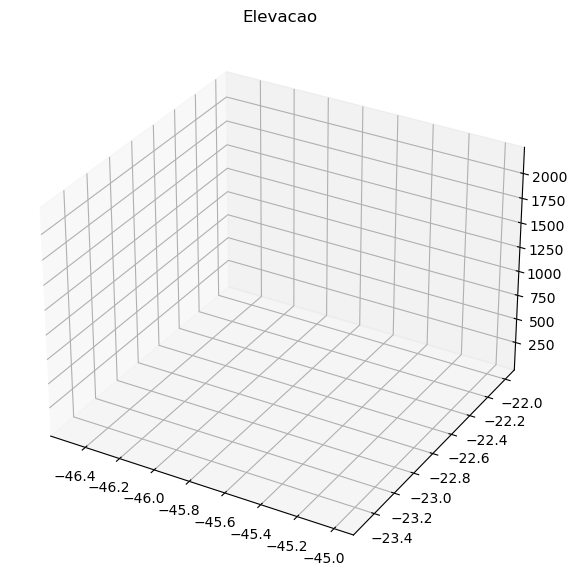

In [6]:

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.set_title('Elevacao')
#ax.set_xlim(-46.5, -43.5) 
#ax.set_ylim(-24.5, -21.5) 
#plt.xticks([-46.0, -45.0, -44.0])
#plt.yticks([-24.0, -23.0, -22.0])

map1 = ax.plot_surface(xnew, ynew, znew, cmap='terrain')

#bra.plot(facecolor='none', edgecolor= 'k', lw=1, ax=ax)
    
#fig.colorbar(map1, label='Altitude (m)')
plt.savefig('./teste.png', format='png')

plt.show()


In [98]:
fig=go.Figure()
fig.add_trace(go.Surface(z=znew, x=xnew, y=ynew))
fig.update_layout(scene=dict(aspectratio=dict(x=2, y=2, z=0.5), xaxis=dict(range=[x_min, x_max],), yaxis=dict(range=[y_min, y_max])))
go_offline.plot(fig, filename='./figure3d.html', validate=True, auto_open=False)


'./figure3d.html'

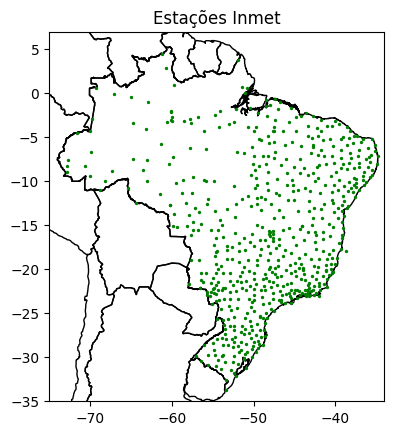

In [77]:
#Gera o mapa da distribuicao das estacoes na AS de acordo com a fonte de dados
def loc_station_as(df, color, name):
    #Criando a lista de pontos
    pontos = [Point(x) for x in zip(df.longitude, df.latitude)]
    
    #Definindo o sistema de coordenadas
    crs={'proj':'latlong','ellps':'WGS84','datum':'WGS84','no_def':True}
    
    #Criando o geodataframe
    list_pontos = gpd.GeoDataFrame(df, geometry=pontos, crs=crs)
    
    fig, ax = plt.subplots()
    
    ax.set_title(f'Estações {name}')
    #ax.set_xlim(-82, -34)
    #ax.set_ylim(-56.0, 13.0)
    ax.set_xlim(-75, -34)
    ax.set_ylim(-35, 7)

    asul.plot(facecolor='none', edgecolor= 'k', lw=1, ax=ax)
    
    for index, row in df.iterrows():
        plt.scatter(row['longitude'],row['latitude'], c=color, s=2)
    
    plt.savefig(f'./output/fig_{name}.png', format='png')
    plt.show()
    return fig

#fig = loc_station_as(df_ana, 'blue', 'ANA')
fig = loc_station_as(df_inmet, 'green', 'Inmet')
#fig = loc_station_as(df_metar, 'red', 'Metar')
#fig = loc_station_as(df_sinda, 'gray', 'Sinda')
#fig = loc_station_as(df_synop, 'purple', 'Synop')
